# Principal Component Analysis (PCA) From Scratch on the UTKFace dataset [1] using numpy only.

[1] https://susanqq.github.io/UTKFace/

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join

# Getting the names of all images
file_names = [f for f in listdir("crop_part1") if isfile(join("crop_part1", f))]

In [3]:
# Creatinh the array X
concat = []
for name in file_names:
    x = Image.open("crop_part1/"+name).resize((64,64), Image.NEAREST)
    concat.append(np.asarray(x.convert('RGB'), dtype = "float32").reshape((4096,3)))
X = np.array(concat)

In [4]:
X.shape

(9780, 4096, 3)

In [5]:
# Different Channels
X_1 = X[:,:,0]
X_2 = X[:,:,1]
X_3 = X[:,:,2]

In [6]:
X_1.shape

(9780, 4096)

## Part 1 (Applying PCA and reporting Explained Variances)

In [7]:
mean_1 = np.mean(X_1, axis = 0)
mean_2 = np.mean(X_2, axis = 0)
mean_3 = np.mean(X_3, axis = 0)

X_1 = X_1 - mean_1
X_2 = X_2 - mean_2
X_3 = X_3 - mean_3

In [8]:
# Cov Matrix and Eigen vectors / values for X_1
cov_matrix = np.cov(X_1)
eigen_values,eigen_vectors = np.linalg.eigh(cov_matrix) #np.linalg.eigh gives you SORTED!!! eigen values in ascending order !!!! (since cov matrix is square we can use eigh instead of eig)
eigen_vectors_1 = eigen_vectors
#First 10
component_vectors_1 = eigen_vectors[-10:]
component_values_1 = eigen_values[-10:]

In [9]:
# Explained Variance (PVE) by first 10 component
explained_variance_1 = component_values_1 / np.sum(eigen_values)
print("Explained Variance By first 10 component for the first channel (PVE):\n", explained_variance_1, "\n")
print("Total Variance Explained for channel 1:", np.sum(component_values_1 / np.sum(eigen_values)))

Explained Variance By first 10 component for the first channel (PVE):
 [0.01993852 0.02123381 0.02392323 0.02518656 0.03240488 0.03513077
 0.04085765 0.06888326 0.18266666 0.18411958] 

Total Variance Explained for channel 1: 0.6343449245419913


In [10]:
# Cov Matrix and Eigen vectors / values for X_2
cov_matrix = np.cov(X_2)
eigen_values,eigen_vectors = np.linalg.eigh(cov_matrix) #np.linalg.eigh gives you SORTED!!! eigen values in ascending order !!!! (since cov matrix is square we can use eigh instead of eig)
#First 10
eigen_vectors_2 = eigen_vectors 
component_vectors_2 = eigen_vectors[-10:]
component_values_2 = eigen_values[-10:]
# Explained Variance (PVE) by first 10 component
explained_variance_2 = component_values_2 / np.sum(eigen_values)
print("Explained Variance By first 10 component for the second channel (PVE):\n", explained_variance_1, "\n")
print("Total Variance Explained for channel 2:", np.sum(component_values_2 / np.sum(eigen_values)))

Explained Variance By first 10 component for the second channel (PVE):
 [0.01993852 0.02123381 0.02392323 0.02518656 0.03240488 0.03513077
 0.04085765 0.06888326 0.18266666 0.18411958] 

Total Variance Explained for channel 2: 0.6210569325531428


In [11]:
# Cov Matrix and Eigen vectors / values for X_3
cov_matrix = np.cov(X_3)
eigen_values,eigen_vectors = np.linalg.eigh(cov_matrix) #np.linalg.eigh gives you SORTED!!! eigen values in ascending order !!!! (since cov matrix is square we can use eigh instead of eig)
#First 10
eigen_vectors_3 = eigen_vectors
component_vectors_3 = eigen_vectors[-10:]
component_values_3 = eigen_values[-10:]
# Explained Variance (PVE) by first 10 component
explained_variance_3 = component_values_3 / np.sum(eigen_values)
print("Explained Variance By first 10 component for the third channel (PVE):\n", explained_variance_3, "\n")
print("Total Variance Explained for channel 3:", np.sum(component_values_3 / np.sum(eigen_values)))

Explained Variance By first 10 component for the third channel (PVE):
 [0.01754161 0.02176189 0.02249965 0.02434782 0.03096965 0.037414
 0.04575249 0.06630303 0.17046874 0.18645123] 

Total Variance Explained for channel 3: 0.6235101134511853


## Part 2 (Displaying the Eigen Faces using the first 10 Principle Component)

In [12]:
components_1 = component_vectors_1.dot(X_1).reshape(10,64,64)
components_2 = component_vectors_2.dot(X_2).reshape(10,64,64)
components_3 = component_vectors_3.dot(X_3).reshape(10,64,64)

components_1 = (components_1 - np.min(components_1))/ (np.max(components_1) - np.min(components_1))
components_2 = (components_2 - np.min(components_2))/ (np.max(components_2) - np.min(components_2))
components_3 = (components_3 - np.min(components_3))/ (np.max(components_3) - np.min(components_3))

In [13]:
images = np.stack((components_1,components_2,components_3), axis = 3) 

In [14]:
images.shape

(10, 64, 64, 3)

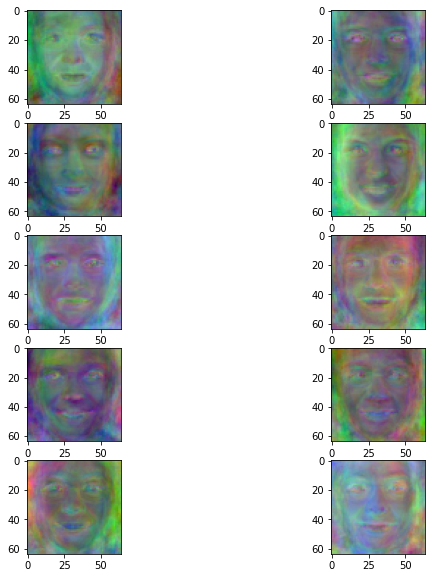

In [15]:
f = plt.figure(figsize = (10,10))
for i in range(images.shape[0]):
    f.add_subplot(5,2 , i + 1)
    plt.imshow(images[i])

plt.show(block=True)

### Part 3 (Reconstructing an original facial image using the k principal components we obtained k ∈ {1, 50, 250, 500, 1000, 4096})

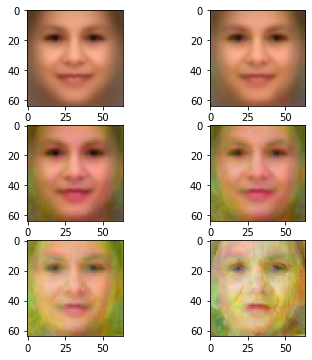

In [17]:
first_image_index = 0
for name in file_names:
    if name == "100 1 0 20170110183726390.jpg.chip.jpg":
        first_image_index = file_names.index("100 1 0 20170110183726390.jpg.chip.jpg")
        break

k = [1, 50, 250, 500, 1000, 4096]
fig = plt.figure(figsize=(6, 6))
columns = 3
rows = 2

i=1
for nb in k:
    comp1 = np.dot(eigen_vectors_1[-nb:],X_1)
    comp2 = np.dot(eigen_vectors_2[-nb:],X_2)
    comp3 = np.dot(eigen_vectors_3[-nb:],X_3)
    
    rec1 = (np.dot(eigen_vectors_1[-nb:].transpose(),comp1) + mean_1)#.reshape(eigen_vectors.shape[0],64,64)
    rec2 = (np.dot(eigen_vectors_2[-nb:].transpose(),comp2) + mean_2)#.reshape(eigen_vectors.shape[0],64,64)
    rec3 = (np.dot(eigen_vectors_3[-nb:].transpose(),comp3) + mean_3)#.reshape(eigen_vectors.shape[0],64,64)
    img = np.stack((rec1[first_image_index].reshape((64,64)),rec2[first_image_index].reshape((64,64)),rec3[first_image_index].reshape((64,64))), axis = 2)
    img = (img - np.min(img))/ (np.max(img) - np.min(img))
    fig.add_subplot(columns,rows,i)
    i += 1
    
    plt.imshow(img)

plt.show()